In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
df = pd.read_csv("mnist.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 419.2 MB


In [4]:
onehot_enc = OneHotEncoder(sparse=False)
X = df.drop("label", axis=1).values
y = onehot_enc.fit_transform(df["label"].values.reshape(-1, 1))

/home/tustunkok/miniconda3/envs/dl/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [5]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.14, random_state=42)

In [6]:
model = Sequential()

model.add(Conv2D(3, kernel_size=5, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

W0828 11:59:21.598627 140338321585984 deprecation_wrapper.py:119] From /home/tustunkok/miniconda3/envs/dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [7]:
model.compile(loss="categorical_crossentropy", \
              optimizer="adam", \
              metrics=["accuracy"])

W0828 11:59:23.365537 140338321585984 deprecation_wrapper.py:119] From /home/tustunkok/miniconda3/envs/dl/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [8]:
X_train.shape

(60199, 784)

In [9]:
y_train.shape

(60199, 10)

In [10]:
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, \
          batch_size=128, epochs=10)

W0828 11:59:27.086170 140338321585984 deprecation_wrapper.py:119] From /home/tustunkok/miniconda3/envs/dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 11:59:27.091372 140338321585984 deprecation_wrapper.py:119] From /home/tustunkok/miniconda3/envs/dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 11:59:27.111618 140338321585984 deprecation_wrapper.py:119] From /home/tustunkok/miniconda3/envs/dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0828 11:59:27.146862 140338321585984 deprecation_wrapper.py:119] From /home/tustunkok/miniconda3/envs/dl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Ple

Epoch 1/10


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
	 [[metrics/acc/Mean/_133]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
0 successful operations.
0 derived errors ignored.

In [9]:
predictions = model.predict(X_test.reshape(-1, 28, 28, 1))
predictions = onehot_enc.inverse_transform(predictions)
y_test = onehot_enc.inverse_transform(y_test)

In [10]:
accuracy_score(y_test, predictions)

0.9390878481787572

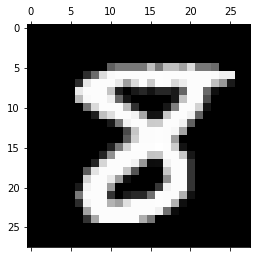

In [12]:
plt.matshow(X_test[0].reshape(28, 28), cmap="gray")
plt.show()

In [13]:
test = model.predict(X_test[0].reshape(1, 28, 28, 1))

In [15]:
onehot_enc.inverse_transform(test)

array([[8.]])